# Utilizaremos neste prejeto o conjunto de dados Abalone, uma espécie de molusco. No nosso caso, queremos classificá-los como uma classe binária indicando se são adultos ou não (0 = não adulto, 1 = adulto).

# Importando as bibliotecas usadas neste projeto

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn import metrics 

import warnings
warnings.filterwarnings('ignore')

# Transformando o arquivo csv em DataFrame:

In [2]:
data_Abalone = pd.read_csv('../Projeto_Abalone/abalone.csv')

# Visualizando as cinco Primeiras Linhas do DataFrame:

In [3]:
data_Abalone.head(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
data_Abalone.index

RangeIndex(start=0, stop=4177, step=1)

In [5]:
data_Abalone.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [96]:
data_Abalone.loc[(data_Abalone['Sex'] == 'M'), 'Adulto'] = 1
data_Abalone.loc[(data_Abalone['Sex'] == 'F'), 'Adulto'] = 0


In [97]:
data_Abalone.head(10)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Adulto
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,1.0
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,1.0
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0.0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,1.0
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20,0.0
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16,0.0
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9,1.0
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19,0.0
10,F,0.525,0.380,0.140,0.6065,0.1940,0.1475,0.210,14,0.0
11,M,0.430,0.350,0.110,0.4060,0.1675,0.0810,0.135,10,1.0


# Limpesa de dados: Detecção de valores ausentes usando a função *isnull( )*

In [8]:
is_null_result = data_Abalone.isnull()
print(is_null_result.head(5))

     Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0  False   False     False   False         False           False   
1  False   False     False   False         False           False   
2  False   False     False   False         False           False   
3  False   False     False   False         False           False   
4  False   False     False   False         False           False   

   Viscera weight  Shell weight  Rings  Adulto  
0           False         False  False   False  
1           False         False  False   False  
2           False         False  False   False  
3           False         False  False   False  
4           False         False  False    True  


In [9]:
quantidade_nulls = is_null_result.sum()
print(quantidade_nulls)

Sex                  0
Length               0
Diameter             0
Height               0
Whole weight         0
Shucked weight       0
Viscera weight       0
Shell weight         0
Rings                0
Adulto            1342
dtype: int64


# Remove os registros que possuem algum campo com valor inexistente:


In [10]:
data_Abalone.dropna(axis=0, how = 'any', inplace = True)
print(data_Abalone.shape)
data_Abalone.head(10)


(2835, 10)


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Adulto
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,1.0
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,1.0
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0.0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,1.0
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20,0.0
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16,0.0
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9,1.0
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19,0.0
10,F,0.525,0.380,0.140,0.6065,0.1940,0.1475,0.210,14,0.0
11,M,0.430,0.350,0.110,0.4060,0.1675,0.0810,0.135,10,1.0


# Montamos as matrizes de features(x) e target(y:)

In [92]:
# features
X = data_Abalone.drop(['Adulto','Sex'], axis = 1)
# target
y = data_Abalone['Adulto']

In [91]:
print('Total por labels: \n', y.groupby(y).count())

Total por labels: 
 Adulto
0.0    1307
1.0    1528
Name: Adulto, dtype: int64


# Criando um modelo KNN k=13:

In [66]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 13)

In [67]:
# separa os dados em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 56)
# ajusta o modelo com os dados de treino
knn.fit(X_train, y_train);
# previsão com os dados de teste
y_pred = knn.predict(X_test)

# Construindo a matriz de confução: 

In [68]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)
print(confusion)

[[162 238]
 [164 287]]


In [69]:
TP = confusion[1, 1]; TN = confusion[0, 0] ; FP = confusion[0, 1] ; FN = confusion[1, 0]
print('TP: ', TP,' TN: ', TN,' FP: ',FP,' FN: ',FN )

TP:  287  TN:  162  FP:  238  FN:  164


# Calculando Accuracy_score:

In [71]:
from sklearn.metrics import accuracy_score
print('Accuracy=', accuracy_score(y_test, y_pred))

Accuracy= 0.5276145710928319


# Calculando o Recall_score:

In [72]:
from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred))

0.6363636363636364


# Calculando o Precision_score:


In [73]:
from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred))

0.5466666666666666


# Calculando o Specificity:

In [74]:
print('Specificity=', (TN)/ (TN + FP))
print('Total de casos negativos corretamente previstos (TN) =',(TN))
print('Total de casos negativos (TN + FP) =',(TN + FP))

Specificity= 0.405
Total de casos negativos corretamente previstos (TN) = 162
Total de casos negativos (TN + FP) = 400


# Calculando o F1_score:

In [75]:
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred))

0.5881147540983606


# Thresholds

In [76]:
pd.Series(y_pred).value_counts()

1.0    525
0.0    326
dtype: int64

In [77]:
y_pred_proba = knn.predict_proba(X_test)

In [78]:
y_pred_proba[5: 9]

array([[0.53846154, 0.46153846],
       [0.69230769, 0.30769231],
       [0.46153846, 0.53846154],
       [0.38461538, 0.61538462]])

In [79]:
# pertencimento a partir das probabilidades
pd.Series(y_pred_proba[:, 1] > 0.5).astype(int).value_counts()

1    525
0    326
dtype: int64

In [80]:
# pertencimento calculado a partir do método .predict()
pd.Series(y_pred).value_counts()

1.0    525
0.0    326
dtype: int64

In [81]:
from sklearn.preprocessing import binarize
y_pred_03 = binarize(y_pred_proba, threshold = 0.3)[:, 1]

In [82]:
y_pred_03 = (y_pred_proba[:, 1] > 0.3).astype(int)

In [83]:
print('Matrix Original')
display(confusion_matrix(y_test,y_pred))
print('')
print('Matrix Nova')
display(confusion_matrix(y_test,y_pred_03))

Matrix Original


array([[162, 238],
       [164, 287]])


Matrix Nova


array([[  6, 394],
       [  8, 443]])

# Calculando Accuracy das duas matrizes:

In [84]:
print('Acc thresholdl 0.5 =', accuracy_score(y_test, y_pred))
print('Acc threshold 0.3 =', accuracy_score(y_test, y_pred_03))

Acc thresholdl 0.5 = 0.5276145710928319
Acc threshold 0.3 = 0.5276145710928319


# Recall

In [85]:
print('Recall threshold 0.5=', recall_score(y_test, y_pred))
print('Recall threshold 0.3=', recall_score(y_test, y_pred_03))

Recall threshold 0.5= 0.6363636363636364
Recall threshold 0.3= 0.9822616407982262


# Precision

In [86]:
print('Precision threshold 0.5=', precision_score(y_test, y_pred))
print('Precision threshold 0.3=', precision_score(y_test, y_pred_03))

Precision threshold 0.5= 0.5466666666666666
Precision threshold 0.3= 0.5292712066905615


# Specificity

In [87]:
# define a função que irá receber como argumentos os valores reais e previstos
def specificity(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    sp = tn / (tn + fp)
    return(sp)

print('Spec threshold 0.5 =', specificity(y_test, y_pred))
print('Spec threshold 0.3 =', specificity(y_test, y_pred_03))

Spec threshold 0.5 = 0.405
Spec threshold 0.3 = 0.015


# Roc_Curve( )

In [88]:
from sklearn.metrics import roc_curve
fpr_log,tpr_log,thr_log = roc_curve(y_test, y_pred_proba[:, 1])

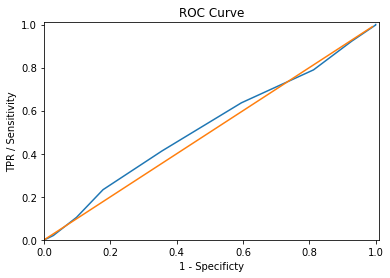

In [89]:
df = pd.DataFrame(dict(fpr = fpr_log, tpr = tpr_log, thr = thr_log))
plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty'); plt.ylabel('TPR / Sensitivity'); plt.title('ROC Curve')
plt.plot(df['fpr'], df['tpr'])
plt.plot(np.arange(0,1, step = 0.01), np.arange(0,1, step = 0.01))
plt.show()

In [90]:
from sklearn.metrics import auc
print('AUC = ', auc(fpr_log, tpr_log))

AUC =  0.5242932372505543
